In [1]:
library(zoo)


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [2]:
amend <- function(result) {
  result.m <- as.matrix(result)
  n <- dim(result.m)[1]
  delta <- apply(abs(result.m[-1,] - result.m[-n,]), 1, sum)
  delta.1 <- apply(abs(result.m[-1,] + result.m[-n,]), 1, sum)
  signs <- c(1, cumprod(rep(-1, n-1) ^ (delta.1 <= delta)))
  zoo(result * signs)
}

In [43]:
for (i in c('USDAUD','USDCAD','USDEUR','USDGBP','USDJPY','USDNZD','USDSEK','USDNOK','USDCHF','USDSGD','USDTHB','USDTWD','USDKRW','USDPHP','USDINR','USDIDR','USDMYR')){
  tt = read.csv(paste0("Signals/",i,".csv"))
  window <- 252
  data <- zoo(tt)
  pc1 <- rollapply(data, window, 
    function(x) summary(princomp(x))$loadings[, 1], 
                 by.column = FALSE, align = "right")
  pc2 <- rollapply(data, window, 
    function(x) summary(princomp(x))$loadings[, 2], 
                 by.column = FALSE, align = "right")
  pc3 <- rollapply(data, window, 
    function(x) summary(princomp(x))$loadings[, 3], 
                 by.column = FALSE, align = "right")
  write.csv(zoo(rowSums(data * amend(pc1)), order.by = index(data)), paste0("nPC1/",i,".csv"), row.names=F)
  write.csv(zoo(rowSums(data * amend(pc2)), order.by = index(data)), paste0("nPC2/",i,".csv"), row.names=F)
  write.csv(zoo(rowSums(data * amend(pc3)), order.by = index(data)), paste0("nPC3/",i,".csv"), row.names=F)
}

In [3]:
# trap <- function(x){
#   res <- summary(princomp(x))$loadings[, 1]
#   print(res)
#   if (res[1] < 0){
#     res <- res * -1
#   }
#   return(res)
# }

In [5]:
data = read.csv(paste0("Signals/","USDSGD",".csv"))
window <- 252
data <- zoo(data)
pc1 <- rollapply(data, window, 
  function(x) summary(princomp(x))$loadings[, 1], 
               by.column = FALSE, align = "right")
# sc <- rollapply(data, window, 
#   function(x) summary(princomp(x))$scores[252, 1], 
#                by.column = FALSE, align = "right")

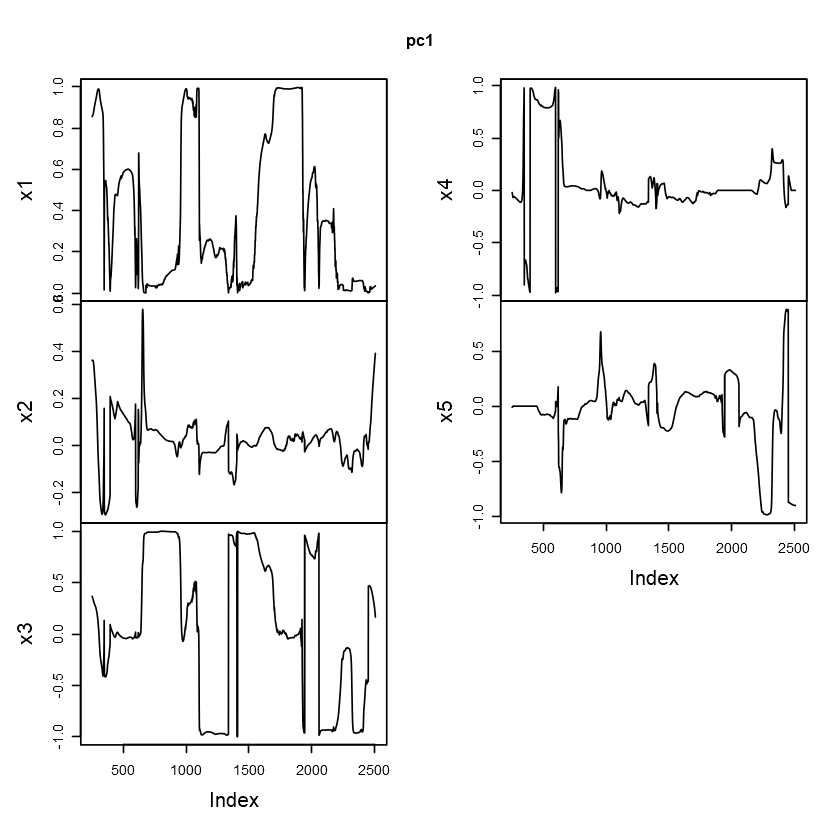

In [6]:
plot(pc1)

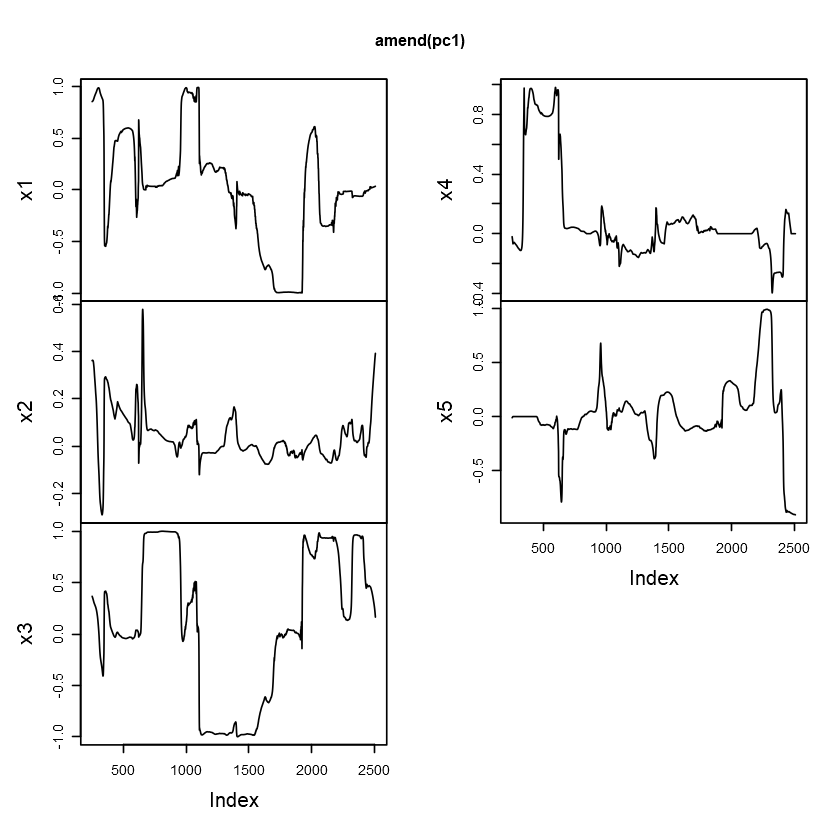

In [7]:
plot(amend(pc1))

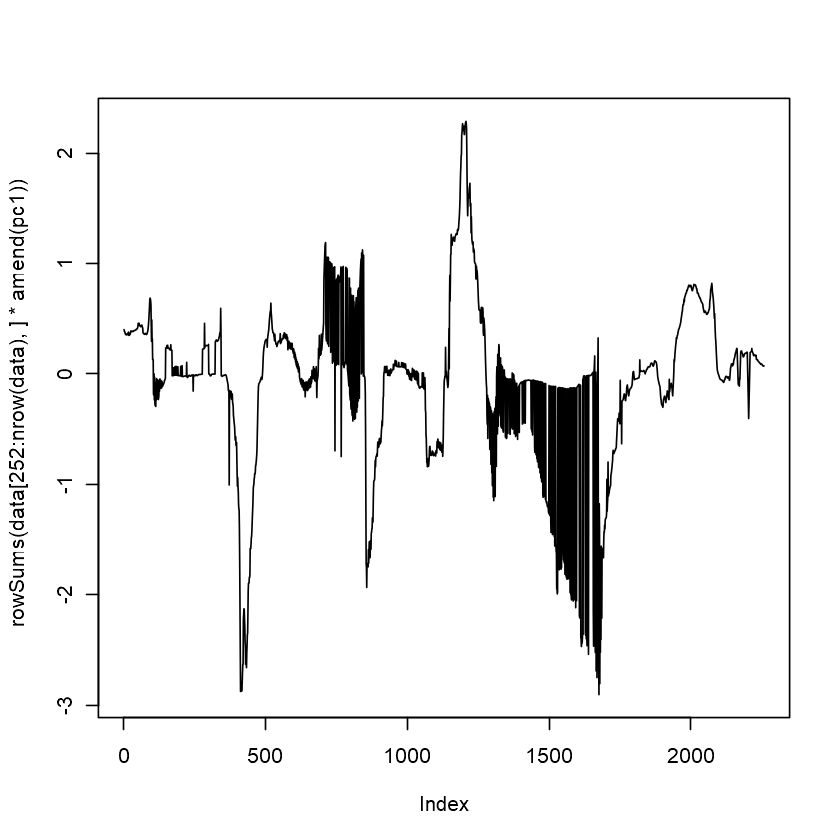

In [42]:
plot(rowSums(data[252:nrow(data),] * amend(pc1)), type="l")

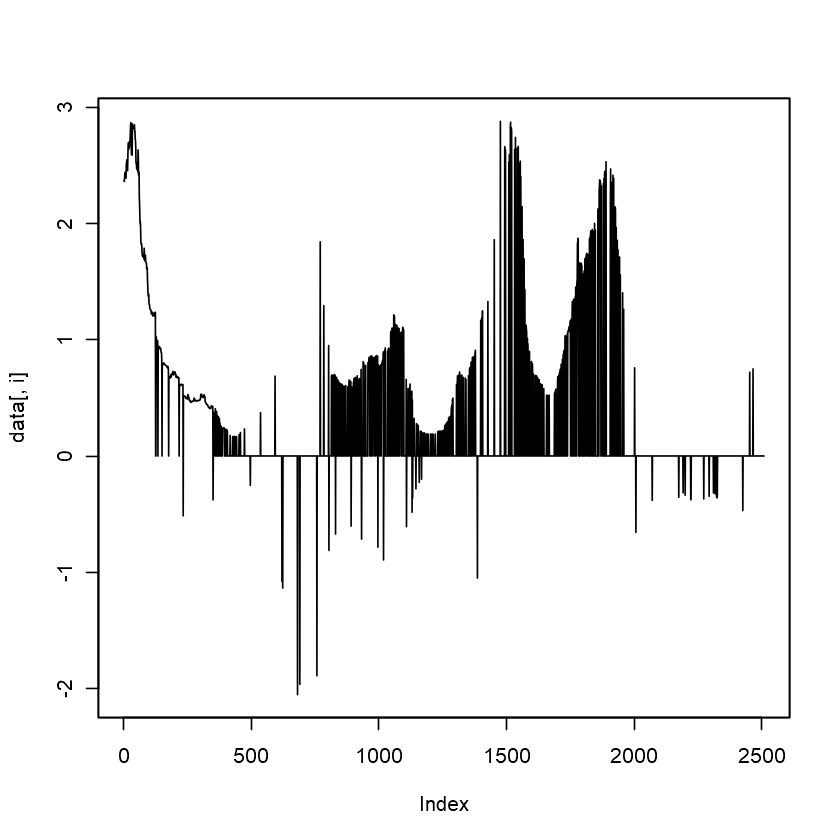

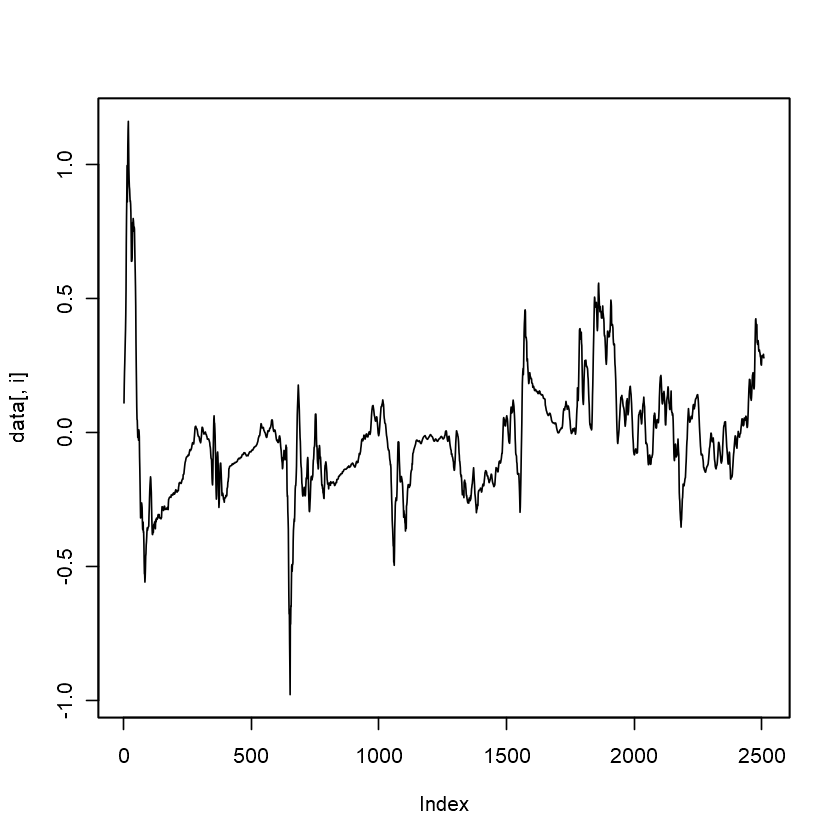

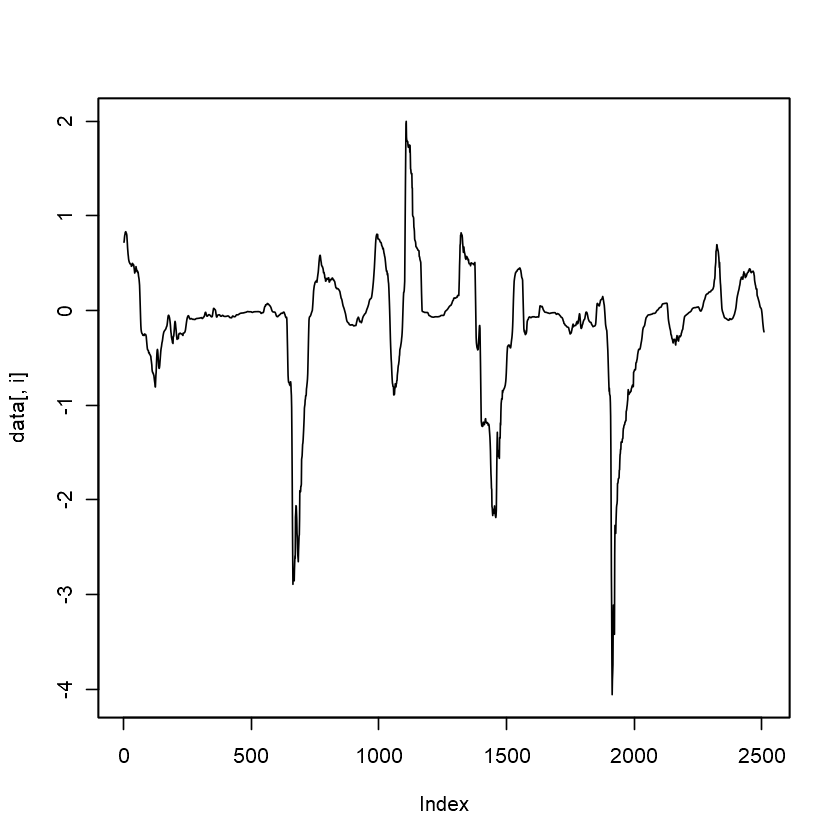

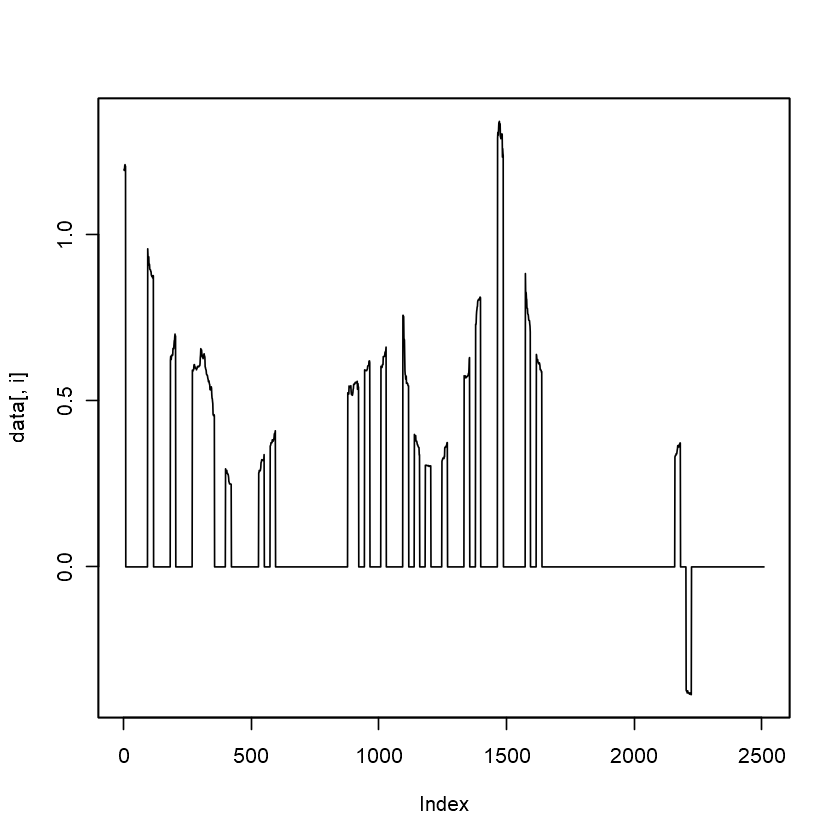

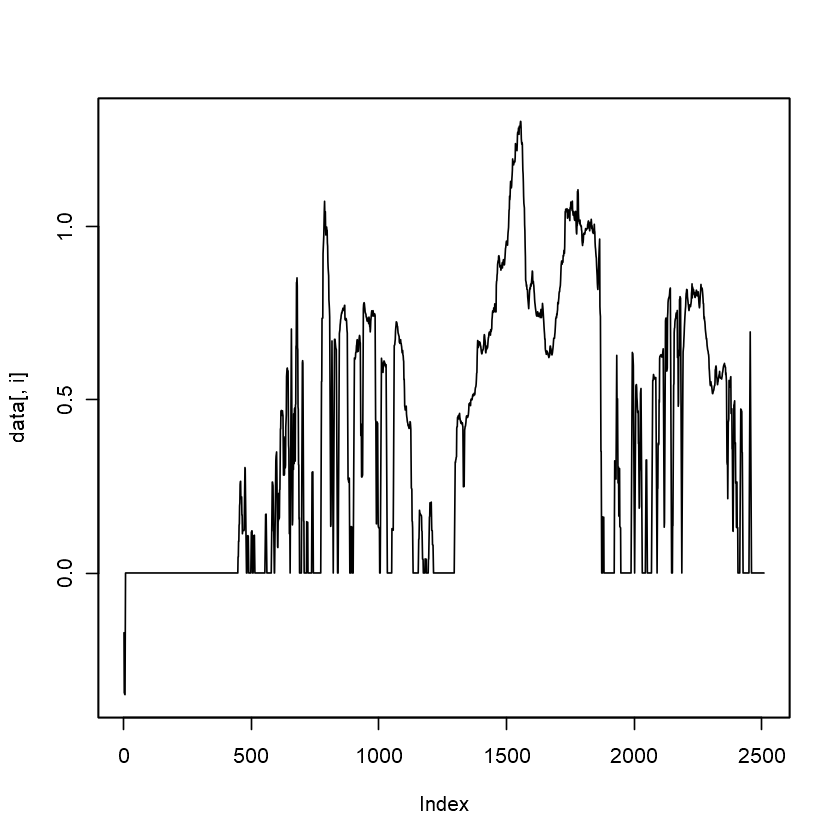

In [41]:
for (i in seq(5)){
  plot(data[,i])
}

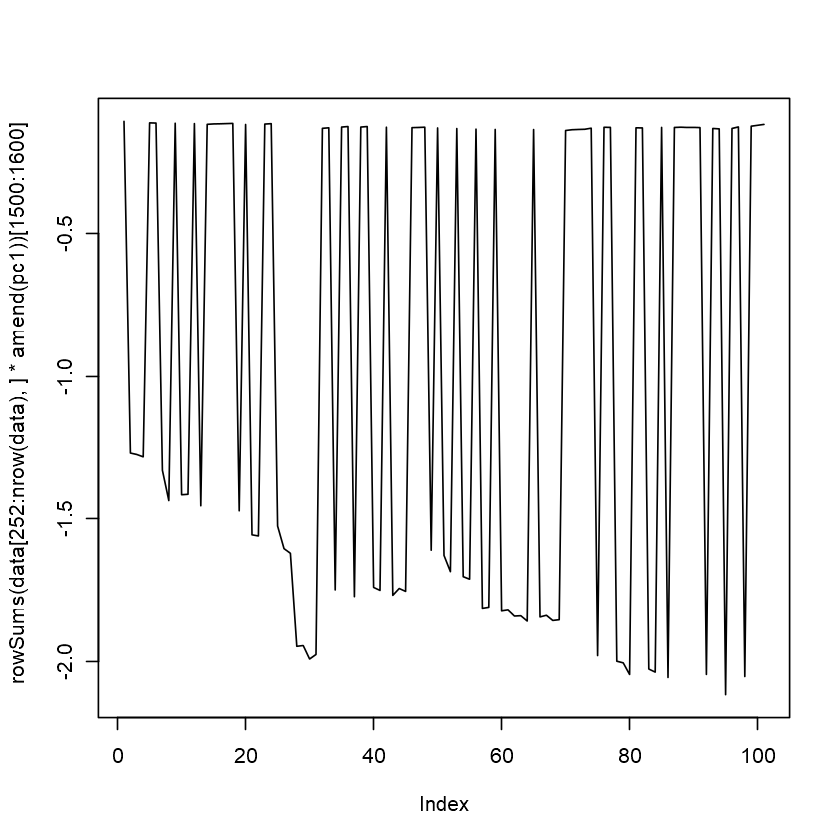

In [133]:
plot(rowSums(data[252:nrow(data),] * amend(pc1))[1500:1600], type="l")

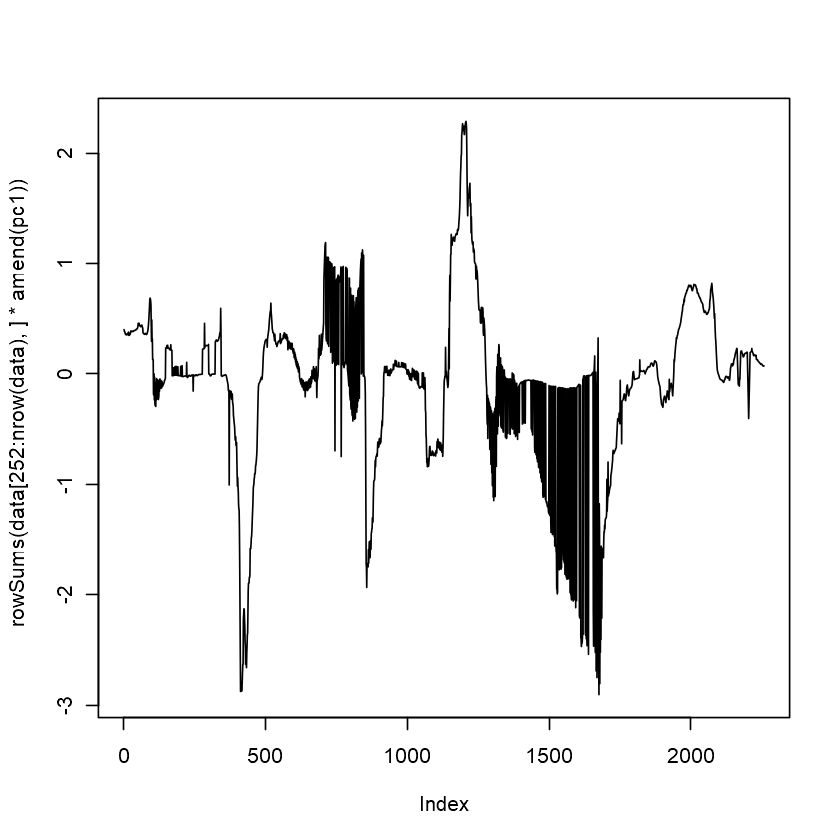

In [135]:
plot(rowSums(data[252:nrow(data),] * amend(pc1)), type="l")

Warning message in zoo(rval[i], index(x)[i]):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"
Warning message in zoo(rval, index(x)[i]):
"some methods for "zoo" objects do not work if the index entries in 'order.by' are not unique"


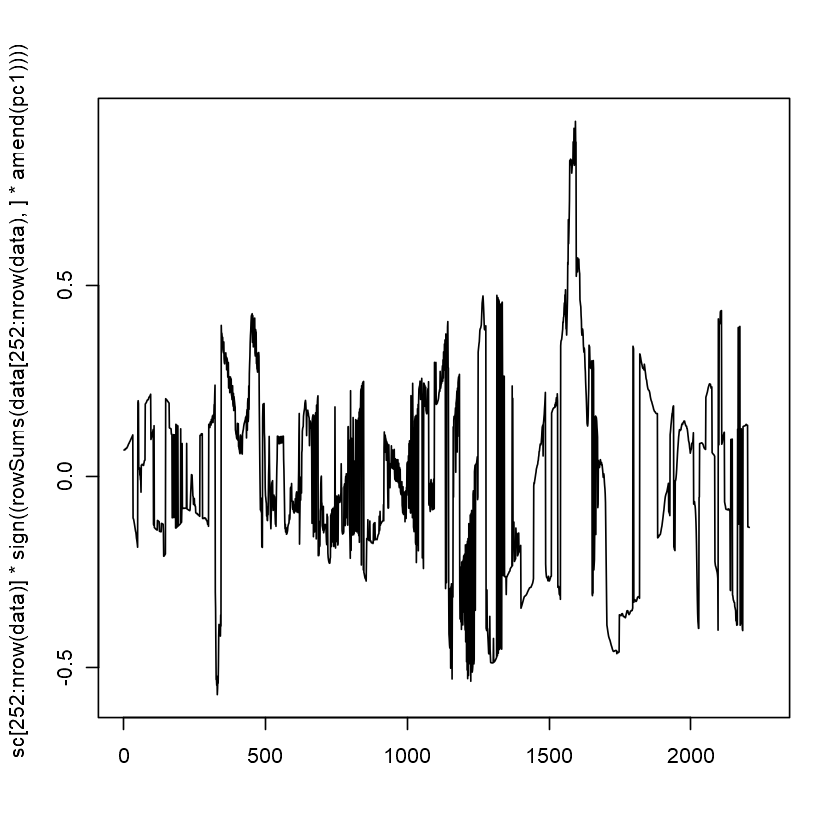

In [151]:
matplot(sc[252:nrow(data)] * sign((rowSums(data[252:nrow(data),] * amend(pc1)))), type="l")

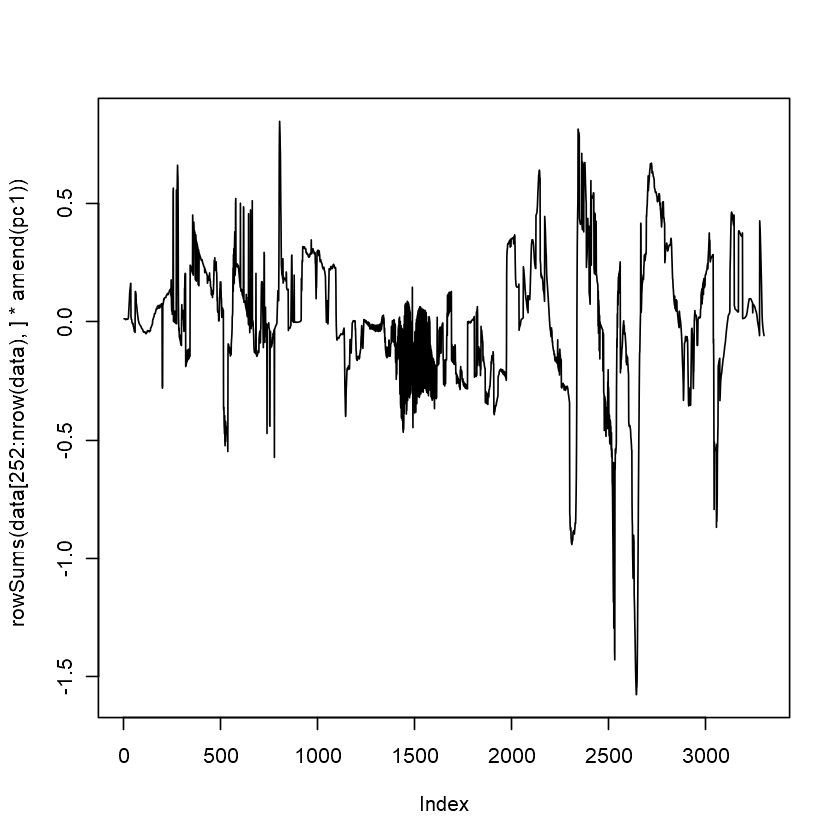

In [40]:
plot(rowSums(data[252:nrow(data),] * amend(pc1)), type="l")

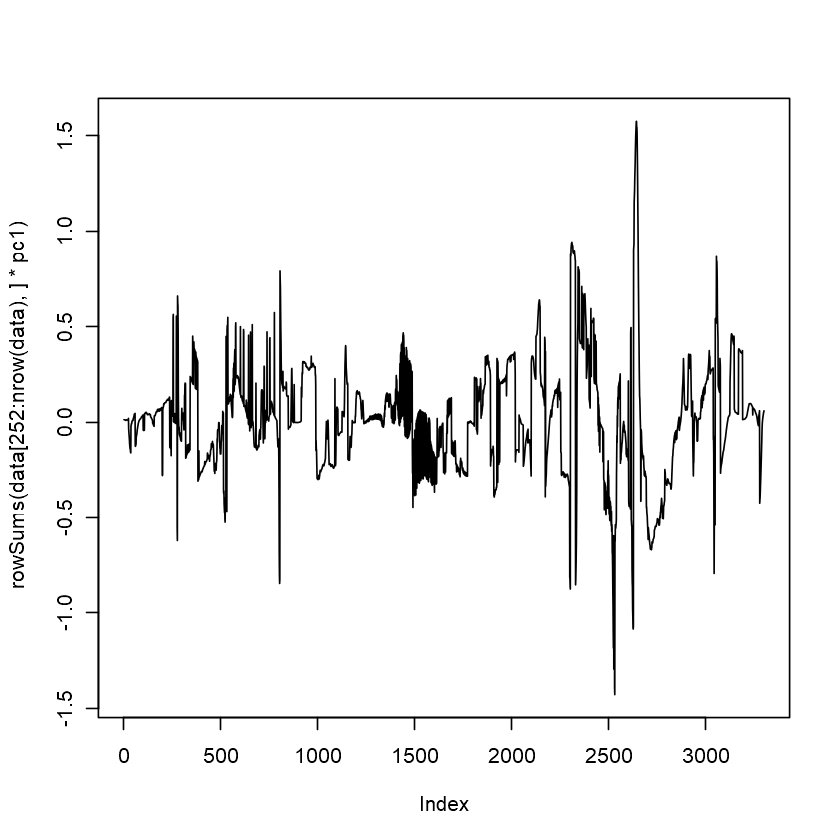

In [41]:
plot(rowSums(data[252:nrow(data),] * pc1), type="l")